In [48]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [49]:
# defining the network
class Net(nn.Module):
  def __init__(self, n):
    super().__init__()
    # an affine operation: y = Wx + b
    self.n = n 
    self.fc1 = nn.Linear(n, n, bias=False)
    self.fc1.weight.data.normal_(0, 1/np.sqrt(n))
    self.fc2 = nn.Linear(n, 1, bias=False)
    self.fc2.weight.data.normal_(0, 1/np.sqrt(n))

  def forward(self, x):
    x = self.fc1(x)
    z_hat = self.fc2(x)
    return z_hat

In [50]:
def avg_k_test(n, k, optimizer):
  
  net = Net(n)
  iter_num = 10
  steps = 200
  lossAvg = np.zeros(steps)
  for i in range(iter_num):
    lossVector = []
    x_input = torch.randn(n)
    z_target = torch.tensor([1.])
    lossVector = []

    alpha = 1/(2*steps)
    lr_SGD = alpha*(float(n)**(-k))
    lr_Adam = lr_SGD  #for now
    loss_f = nn.MSELoss()

    #optimizer:
    if optimizer == 'SGD':
      optimizer = optim.SGD(net.parameters(), lr_SGD) 
    if optimizer == 'Adam':
      optimizer = optim.Adam(net.parameters(), lr_Adam)
    
    for i in range(steps):
      optimizer.zero_grad()
      z_hat = net.forward(x_input)
      loss = loss_f(z_hat, z_target)
      lossVector.append(loss)
      loss.backward()
      optimizer.step()
    lossAvg =  + np.array(lossVector)
  
  return lossAvg/iter_num

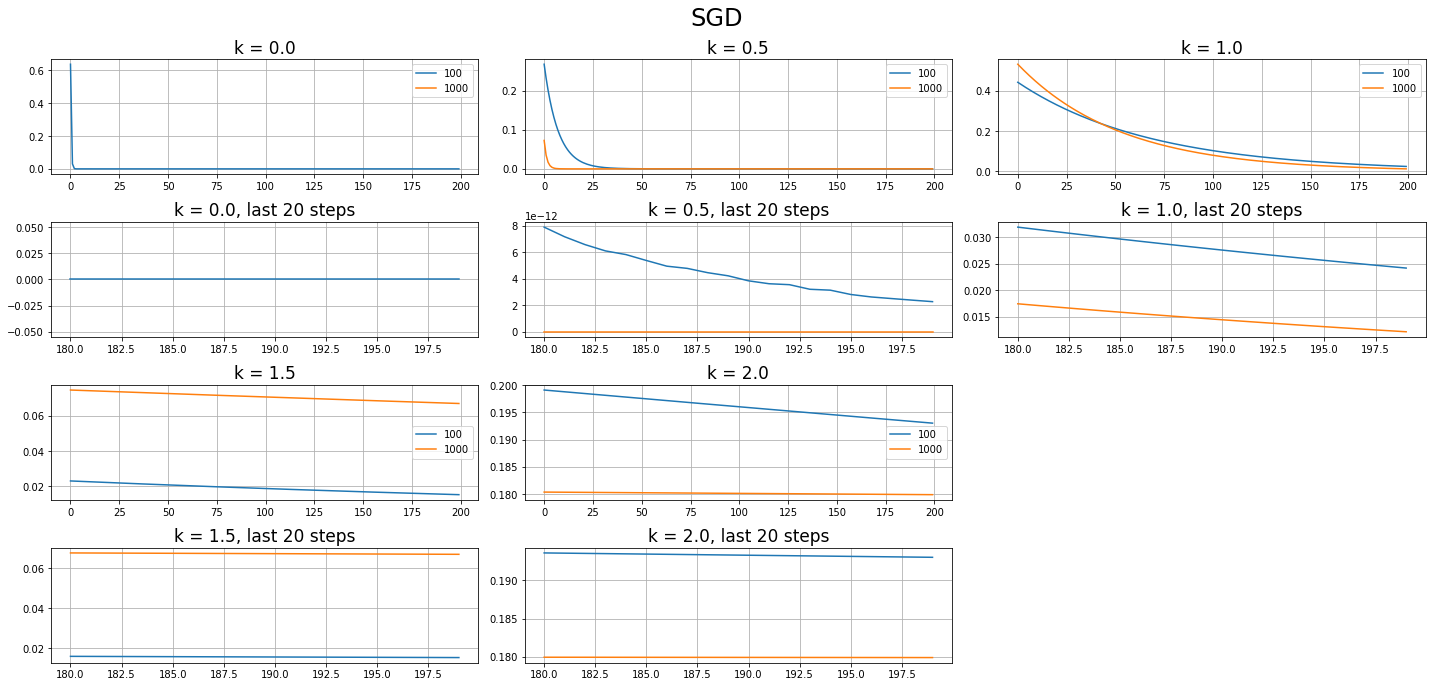

In [51]:
# testing different k's for SGD
n_sizes = np.array([100,1000])
K = np.array([0,0.5,1,1.5,2])
x = np.arange(200)
fig = plt.figure(figsize=(20, 10))
fig.suptitle('SGD', fontsize = 24)
j = 1
for k in K:
  STR = "k = " + str(k)
  STR_zoom = "k = " + str(k) + ", last 20 steps"
  if j == 4:
    j = 7
  ax1 = fig.add_subplot(4,3,j)
  ax1.grid()
  ax2 = fig.add_subplot(4,3,j+3)
  ax2.grid()
  for n in n_sizes:
    loss_i = avg_k_test(n, k, 'SGD')
    ax1.plot(x, loss_i, label = n)
    ax2.plot(x[180:], loss_i[180:])
  ax1.set_title(STR, fontsize=17)
  ax2.set_title(STR_zoom, fontsize=17)
  ax1.legend()
  j += 1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

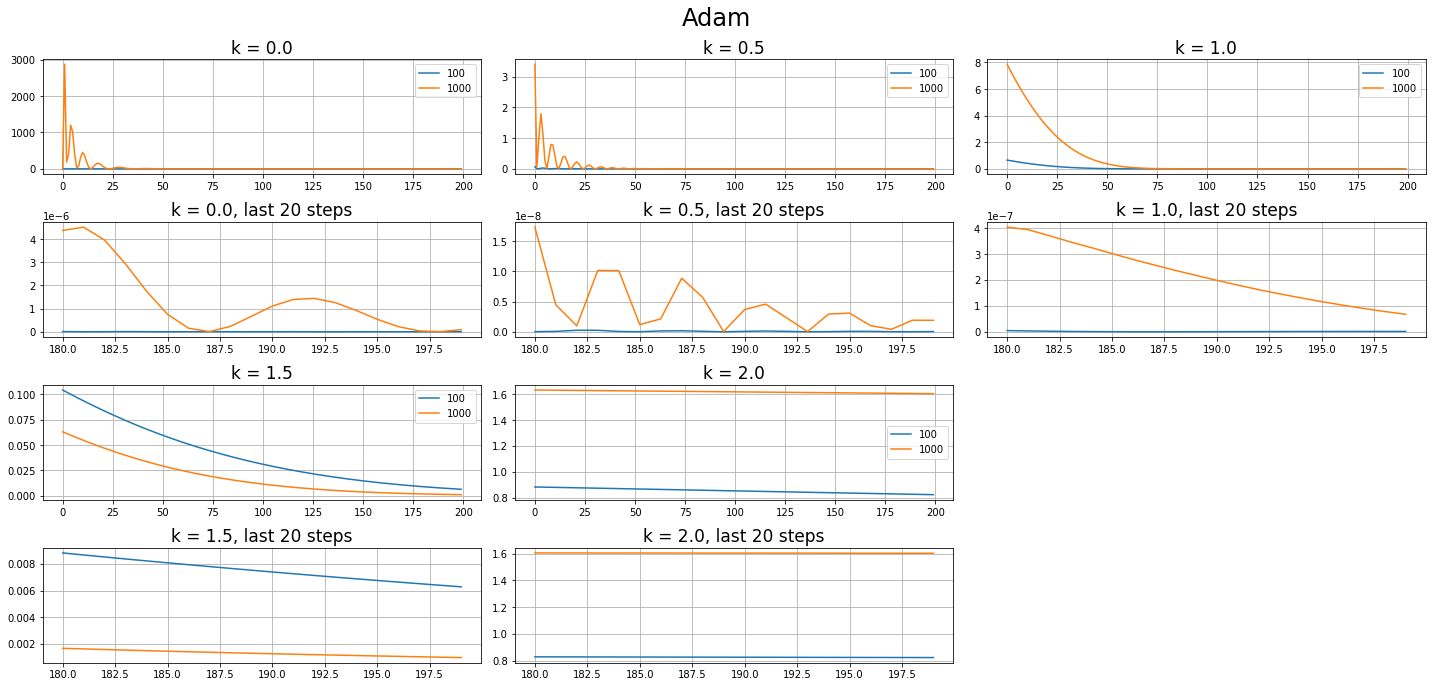

In [52]:
# testing different k's for SGD
n_sizes = np.array([100,1000])
initialized_nn = init_nn(n_sizes)
K = np.array([0,0.5,1,1.5,2])
x = np.arange(200)
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Adam', fontsize = 24)
j = 1
for k in K:
  STR = "k = " + str(k)
  STR_zoom = "k = " + str(k) + ", last 20 steps"
  if j == 4:
    j = 7
  ax1 = fig.add_subplot(4,3,j)
  ax1.grid()
  ax2 = fig.add_subplot(4,3,j+3)
  ax2.grid()
  for net in initialized_nn:
    loss_i = single_k_test(net, k, 'Adam')
    ax1.plot(x, loss_i, label = net.n)
    ax2.plot(x[180:], loss_i[180:])
  ax1.set_title(STR, fontsize=17)
  ax2.set_title(STR_zoom, fontsize=17)
  ax1.legend()
  j += 1

fig.tight_layout(rect=[0, 0.03, 1, 0.95])